In [20]:
"""
QUIZ - Teknik Klasifikasi dan Pengenalan Pola
Author  : Muhammad Rizqi Subeno
NIM     : 22/495313/PTK/14431
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
data = np.array([[0.6, 1.9], [0.8, 2.0], [1.2, 0.6], [2.2, 0.5],
                 [1.5, 0.5], [1.9, 2.0], [2.2, 1.9]])

kelas = np.array([1, 1, 2, 2, 2, 3, 3])

x1 = data[:,0]
x2 = data[:,1]

In [22]:
df = pd.DataFrame({"x1":x1, "x2":x2, "kelas":kelas})
display(df)

,x1,x2,kelas
0,0.6,1.9,1
1,0.8,2.0,1
2,1.2,0.6,2
3,2.2,0.5,2
4,1.5,0.5,2
5,1.9,2.0,3
6,2.2,1.9,3


1. Tampilan 2D untuk Tabel tersebut

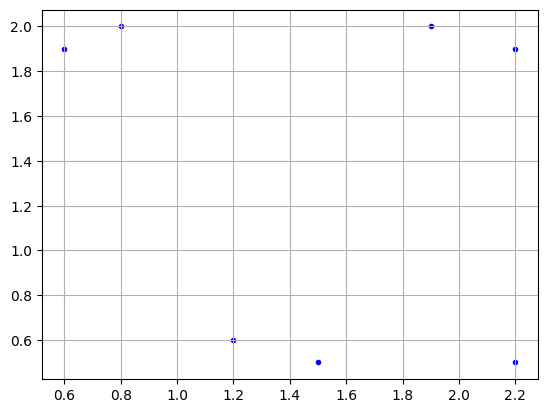

In [23]:
plt.scatter(x1, x2, color="blue", marker=".")
plt.grid(True)
plt.show()  

-----------------------------------------------------

2a. Buat program untuk menentukan persamaan garis pembeda (decision line) untuk masing - masing pola.

## Fungsi aktivasi bipolar / hardlim
$$hardlim(x)=\begin{cases}
1, \text{if } x\geq0 \\
-1, \text{if } x<0 \end{cases}$$

In [24]:
def aktivasi_hardlim(x):
    out = np.array([-1 if x_<0 else 1 for x_ in x])
    return out

Fungsi klasifikasi dengan Regresi Linear
$$\begin{aligned}\begin{aligned}\begin{pmatrix}
1.0 & x1_{0} & x2_{0} \\
1.0 & x1_{1} & x2_{1} \\
1.0 & ... & ... \\
1.0 & x1_{n} & x2_{n} \\ \end{pmatrix}\end{aligned}\begin{pmatrix}
w0 \\ w1 \\ w2\end{pmatrix}&=\begin{pmatrix}
+1 \\ ... \\ ... \\ -1 \end{pmatrix} \\
\begin{pmatrix} 
w0 \\ w1 \\ w2 \end{pmatrix} &=
\begin{pmatrix}\begin{pmatrix}
1.0 & 1.0 & ... & 1.0 \\ 
x1_{0} & x1_{1} & ... & x1_{n} \\
x2_{0} & x2_{1} & ... & x2_{n} \end{pmatrix}\begin{pmatrix}
1.0 & x1_{0} & x2_{0} \\
1.0 & x1_{1} & x2_{1} \\
1.0 & ... & ... \\
1.0 & x1_{n} & x2_{n} \\ \end{pmatrix}\end{pmatrix}^{-1}
\begin{pmatrix}
1.0 & 1.0 & ... & 1.0 \\ 
x1_{0} & x1_{1} & ... & x1_{n} \\
x2_{0} & x2_{1} & ... & x2_{n} \end{pmatrix}
\begin{pmatrix}
+1 \\ ... \\ ... \\ -1 \end{pmatrix}\end{aligned}$$

In [25]:
def klasifikasi_regresi_linear(inp, out):
    return np.matmul(np.matmul(np.linalg.inv(np.matmul(inp.T,inp)),inp.T),out)

bentuk input seperti matriks diatas
$$\begin{aligned}\begin{pmatrix}
x1_{0} & x2_{0} \\
x1_{1} & x2_{1} \\
... & ... \\
x1_{n} & x2_{n} \\\end{pmatrix}\end{aligned} \rightarrow
\begin{aligned}\begin{pmatrix}
1.0 & x1_{0} & x2_{0} \\
1.0 & x1_{1} & x2_{1} \\
1.0 & ... & ... \\
1.0 & x1_{n} & x2_{n} \\\end{pmatrix}\end{aligned}$$

In [26]:
def klasifikasi_kelas(data):

    # tambah bias pada matrix input
    jumlah_data, _ = data.shape
    bias = np.array([[1] for _ in range(jumlah_data)]) 
    input_data = np.hstack((bias, data)) 

    # batas data tiap kelas
    kelas_1 = [0, 2]
    kelas_2 = [2, 5]
    kelas_3 = [5, 7]

    # urutan klasifikasi kelas
    urutan_klasifikasi = np.array([[kelas_1, kelas_2], 
                                   [kelas_1, kelas_3], 
                                   [kelas_2, kelas_3]])
    
    #inisiasi weight untuk 3 klasfikasi
    n_urutan, _, _ = urutan_klasifikasi.shape
    weight = np.zeros((n_urutan, 3))

    # iterasi untuk klasifikasi kelas
    for i in range(n_urutan):
        kelas_1 = input_data[urutan_klasifikasi[i][0][0]:urutan_klasifikasi[i][0][1],:]
        kelas_2 = input_data[urutan_klasifikasi[i][1][0]:urutan_klasifikasi[i][1][1],:]
        input_kelas = np.vstack((kelas_1, kelas_2))

        out_kelas1 = np.array([[1] for _ in range(len(kelas_1))])
        out_kelas2 = np.array([[-1] for _ in range(len(kelas_2))])
        output_kelas = np.vstack((out_kelas1, out_kelas2))

        weight[i] = np.round(np.transpose(klasifikasi_regresi_linear(input_kelas, output_kelas)),1)
    
    return weight
        


In [27]:
# panggil klasifikasi kelas
weight = klasifikasi_kelas(data)

jumlah_data, _ = data.shape

# tambah bias pada matrix input
bias = np.array([[1] for _ in range(jumlah_data)]) 
input_data = np.hstack((bias, data)) 

# perkalian bobot yang telah dikalkulasikan dikalikan dengan input 
# untuk penentuan nilai klasifikasi dengan garis
y0 = np.matmul(weight[0], input_data.T)
y1 = np.matmul(weight[1], input_data.T)
y2 = np.matmul(weight[2], input_data.T)

#bulatkan ke 1 angka decimal
y0 = np.round(y0, 1)
y1 = np.round(y1, 1)
y2 = np.round(y2, 1)

#aktivasi menggunakan hardlimit output +1 dan -1
F0 = aktivasi_hardlim(y0)
F1 = aktivasi_hardlim(y1)
F2 = aktivasi_hardlim(y2)


labelling data

In [28]:
# batas data tiap kelas
kelas_1 = [0, 2]
kelas_2 = [2, 5]
kelas_3 = [5, 7]

#labelling data
klasifikasi_1 = np.append(np.arange(kelas_1[0], kelas_1[1]), np.arange(kelas_2[0], kelas_2[1]))
klasifikasi_2 = np.append(np.arange(kelas_1[0], kelas_1[1]), np.arange(kelas_3[0], kelas_3[1]))
klasifikasi_3 = np.append(np.arange(kelas_2[0], kelas_2[1]), np.arange(kelas_2[0], kelas_2[1]))

out = np.empty(shape=jumlah_data, dtype=object)

for i in klasifikasi_1:
    if F0[i] == 1:
        out[i] = "kelas 1"
    elif F0[i] == -1:
        out[i] = "kelas 2"  

for i in klasifikasi_2:
    if F1[i] == 1:
        out[i] = "kelas 1"
    elif F1[i] == -1:
        out[i] = "kelas 3"

for i in klasifikasi_3:
    if F2[i] == 1:
        out[i] = "kelas 2"
    elif F2[i] == -1:
        out[i] = "kelas 3" 

tampilkan dalam bentuk tabel

In [29]:
df = pd.DataFrame({"x1":x1, "x2":x2, "y0":y0, "y1":y1, 
                   "y2":y2, "F0":F0, "F1":F1, "F2":F2, "out": out})
df.index += 1
display(df)

,x1,x2,y0,y1,y2,F0,F1,F2,out
1,0.6,1.9,1.0,1.2,-0.7,1,1,-1,kelas 1
2,0.8,2.0,1.2,0.9,-0.9,1,1,-1,kelas 1
3,1.2,0.6,-0.9,1.3,1.0,-1,1,1,kelas 2
4,2.2,0.5,-0.9,-0.0,1.1,-1,1,1,kelas 2
5,1.5,0.5,-1.0,1.0,1.2,-1,1,1,kelas 2
6,1.9,2.0,1.3,-0.7,-1.0,1,-1,-1,kelas 3
7,2.2,1.9,1.2,-1.0,-0.9,1,-1,-1,kelas 3


2b. tuliskan persamaan garis pembeda

In [30]:
for i in range(3):
    print("persamaan ke-{} : {}+{}x1+{}x2=0".format(i, weight[i][0], weight[i][1], weight[i][2]))

persamaan ke-0 : -1.9+0.1x1+1.5x2=0
persamaan ke-1 : 3.4+-1.4x1+-0.7x2=0
persamaan ke-2 : 2.0+-0.1x1+-1.4x2=0


2c. tampilkan matriks bobot

In [31]:
for i in range(3):
    print("vektor bobot klasifikasi ke-{} adalah \n{}".format(i, weight[i]))

vektor bobot klasifikasi ke-0 adalah 
[-1.9  0.1  1.5]
vektor bobot klasifikasi ke-1 adalah 
[ 3.4 -1.4 -0.7]
vektor bobot klasifikasi ke-2 adalah 
[ 2.  -0.1 -1.4]


2d. ketika ada masukkan (x1,x2)= (2.2, 1.4), tentukan termasuk di dalam pola mana.

In [32]:
cek_input=np.array([2.2, 1.4])

# adding bias to cek_input
input_data = np.hstack(([1],cek_input))

y0 = np.matmul(weight[0], input_data)
y1 = np.matmul(weight[1], input_data)
y2 = np.matmul(weight[2], input_data)

# bulatkan
y0 = np.round(y0, 1)
y1 = np.round(y1, 1)
y2 = np.round(y2, 1)

F0 = -1 if y0<0 else 1
F1 = -1 if y1<0 else 1
F2 = -1 if y2<0 else 1

In [33]:
df_cek = pd.DataFrame({"x1":cek_input[0], "x2":cek_input[1], "y0":y0, "y1":y1, 
                       "y2":y2, "F0":F0, "F1":F1, "F2":F2}, index=[1])
display(df_cek)

,x1,x2,y0,y1,y2,F0,F1,F2
1,2.2,1.4,0.4,-0.7,-0.2,1,-1,-1


Tampilkan dalam bentuk grafik

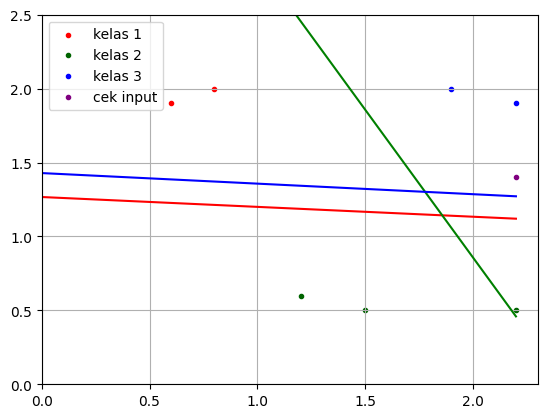

In [34]:
x = np.arange(0,2.2,0.001)
y = lambda x2, w: -(w[0]+w[1]*x2)/w[2]
garis_klasifikasi1 = y(x, weight[0])
garis_klasifikasi2 = y(x, weight[1])
garis_klasifikasi3 = y(x, weight[2]) 

plt.scatter(x1[0:2], x2[0:2], color="red", marker=".", label="kelas 1")
plt.scatter(x1[2:5], x2[2:5], color="darkgreen", marker=".", label="kelas 2")
plt.scatter(x1[5:7], x2[5:7], color="blue", marker=".", label="kelas 3")
plt.scatter(cek_input[0], cek_input[1], color="purple", marker=".", label="cek input")
plt.plot(x, garis_klasifikasi1, color="red")
plt.plot(x, garis_klasifikasi2, color="green")
plt.plot(x, garis_klasifikasi3, color="blue")
plt.xlim(0,2.3)
plt.ylim(0,2.5)
plt.grid(True)
plt.legend()
plt.show()  

<style>
th {
  padding-top: 5px;
  padding-right: 10px;
  padding-bottom: 5px;
  padding-left: 10px;
}
</style>

|       | F0| F1| F2|
| :---: |:-:|:-:|:-:|
|Kelas 1| + | + |   |
|Kelas 2| - |   | + |
|Kelas 3|   | - | - |

Apabila masukkan (2.2, 1.4) dimasukkan kedalam klasifikasi garis linear, maka didapatkan (F0:+1, F1:-1, F2:-1). Dilihat dari tabel diatas apabila diklasifikasi menurut baris, termasuk ke dalam kelas 3. Selain itu, apabila dimasukkan ke dalam grafik 2d pada grafik matplotlib, titik termasuk kedalam kelas 3.

-----------------------------------------------------

3a. buat program untuk menentukan kelas dengan metode 3-nn (3 nearest neighbor) dan jarak city-block

In [35]:
def city_block(data, x):
    """
    city_block distance between centroid & x point.
    """
    return np.sum(np.abs(data-x), axis=1)

K nearest Neighbor -> Supervised Learning on ML

In [36]:
def knn_predict(x, data, kelas, num_neighbor=3):
    # hitung jarak menggunakan city block
    jarak = city_block(data,x)
    #print(jarak)
    # ambil k-argumen array terdekat yang telah diurutkan (k=num_neighbor)
    id_jarak_terdekat = np.argsort(jarak)[:num_neighbor]
    #print(id_jarak_terdekat)
    #ambil nilai kelas tiap tetangga terdekat
    kelas_tetangga = [kelas[i] for i in id_jarak_terdekat]
    #print(kelas_tetangga)
    # ambil nilai dan kemunculan tiap nilai
    val, count = np.unique(kelas_tetangga, return_counts=True)
    # print(val)
    # print("_________")
    # print(count)
    # ambil argumen (posisi) pada nilai yang muncul paling banyak
    id_most_common = np.argmax(count)
    #print(id_most_common)
    #output fungsi yaitu kelas terdekat yang sering muncul pada urutan ke-k
    return val[id_most_common]

3b. masukkan (x1,x2)=(1.4,2.2) tentukan termasuk dalam pola mana

In [37]:
cek_input = [1.4,2.2]
output_kelas = knn_predict(cek_input, data, kelas, num_neighbor=3)
print("input x1={}, x2={} masuk kelas {}".format(cek_input[0], cek_input[1], output_kelas))

input x1=1.4, x2=2.2 masuk kelas 1


apabila tidak percaya kode diatas, mari kita buktikan dengan library yang telah ada :

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN object with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using training data
knn.fit(data, kelas)

# Predict the class labels for test data
prediksi_kelas = knn.predict([cek_input])
print(prediksi_kelas)

[1]
